Bayesian Inference implies the combination of two different distributions (likelihood and prior) into one (posterior). The classic maximum likelihood estimation (MLE) doesn’t take into account a prior. Once we calculate the posterior, we use it to find the “best” parameters and the “best” is in terms of maximizing the posterior probability, given the data. This process is called Maximum A Posteriori (MAP). The optimization used in MAP is the same as the one used in typical machine learning, such as gradient descent or Newton’s method.
Bayesian Inference has three steps.
Step 1. [Prior] Choose a PDF to model your parameter θ, aka the prior distribution P(θ). This is your best guess about parameters before seeing the data X.
Step 2. [Likelihood] Choose a PDF for P(X|θ). Basically you are modeling how the data X will look like given the parameter θ.
Step 3. [Posterior] Calculate the posterior distribution P(θ|X) and pick the θ that has the highest P(θ|X).
And the posterior becomes the new prior. Repeat step 3 as you get more data. Credit: Aerin Kim

In [1]:
import numpy as np
np.set_printoptions(threshold=100)
# Generating 2,000 readers' reponse. 
# Assuming the claps follow a Bernoulli process - a sequence of binary (success/failure) random variables.
# 1 means clap. 0 means no clap.
# We pick the success rate of 30%.
clap_prob = 0.3
# IID (independent and identically distributed) assumption
clap_data = np.random.binomial(n=1, p=clap_prob, size=2000)

In [2]:
clap_data

array([1, 0, 0, ..., 0, 0, 1])

In [3]:
len(clap_data)

2000

In [4]:
import scipy.stats as stats
import matplotlib.pyplot as plt
a = 400
b = 2000 - a
# domain θ
theta_range = np.linspace(0, 1, 1000)
# prior P(θ)
prior = stats.beta.pdf(x = theta_range, a=a, b=b)

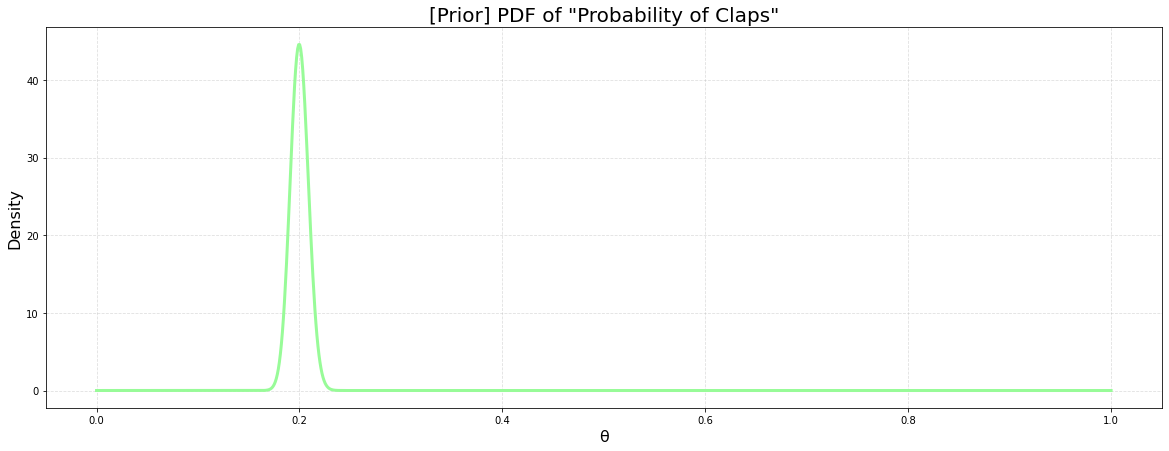

In [5]:
# Plotting the prior distribution
plt.rcParams['figure.figsize'] = [20, 7]
fig, ax = plt.subplots()
plt.plot(theta_range, prior, linewidth=3, color='palegreen')
# Add a title
plt.title('[Prior] PDF of "Probability of Claps"', fontsize=20)
# Add X and y Label
plt.xlabel('θ', fontsize=16)
plt.ylabel('Density', fontsize=16)
# Add a grid
plt.grid(alpha=.4, linestyle='--')
# Show the plot
plt.show()

Choose a probability model for P(X|θ), the probability of seeing the data X given a particular parameter θ. Likelihood is also called a sampling distribution. 

In [6]:
# The sampling dist P(X|θ) with a given clap_prob(θ)
likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = clap_prob)

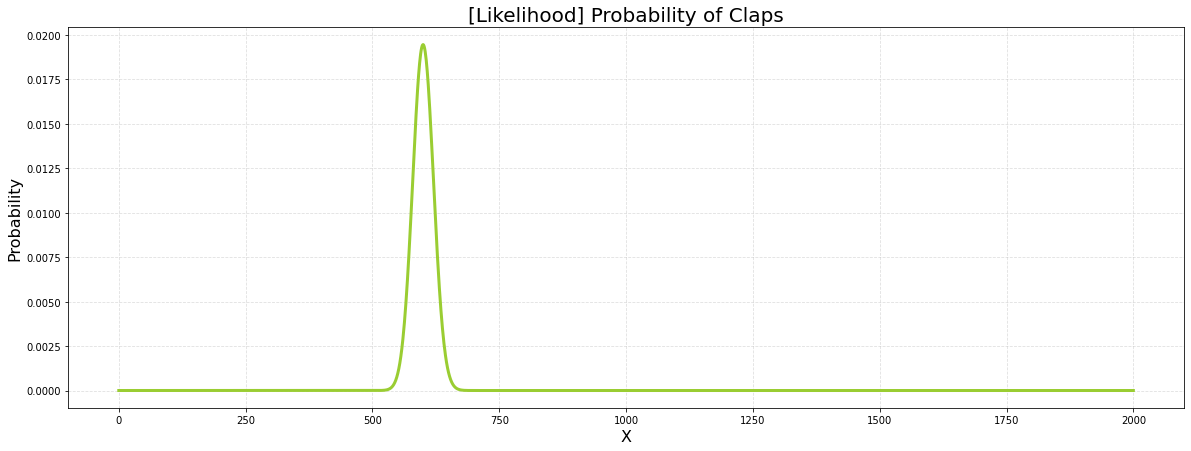

In [7]:
# Domain (# of claps)
X = np.arange(0, len(clap_data)+1)
# Likelihood P(X|θ) for all X's
likelihood = stats.binom.pmf(k = X, n = len(clap_data), p = clap_prob)
# Create the plot
fig, ax = plt.subplots()
plt.plot(X, likelihood, linewidth=3, color='yellowgreen')
# Add a title
plt.title('[Likelihood] Probability of Claps' , fontsize=20)
# Add X and y Label
plt.xlabel('X', fontsize=16)
plt.ylabel('Probability', fontsize=16)
# Add a grid
plt.grid(alpha=.4, linestyle='--')
# Show the plot
plt.show()

In [8]:
theta_range_e = theta_range + 0.001 
prior = stats.beta.cdf(x = theta_range_e, a=a, b=b) - stats.beta.cdf(x = theta_range, a=a, b=b) 
# prior = stats.beta.pdf(x = theta_range, a=a, b=b)
likelihood = stats.binom.pmf(k = np.sum(clap_data), n = len(clap_data), p = theta_range) 
posterior = likelihood * prior 
normalized_posterior = posterior / np.sum(posterior)

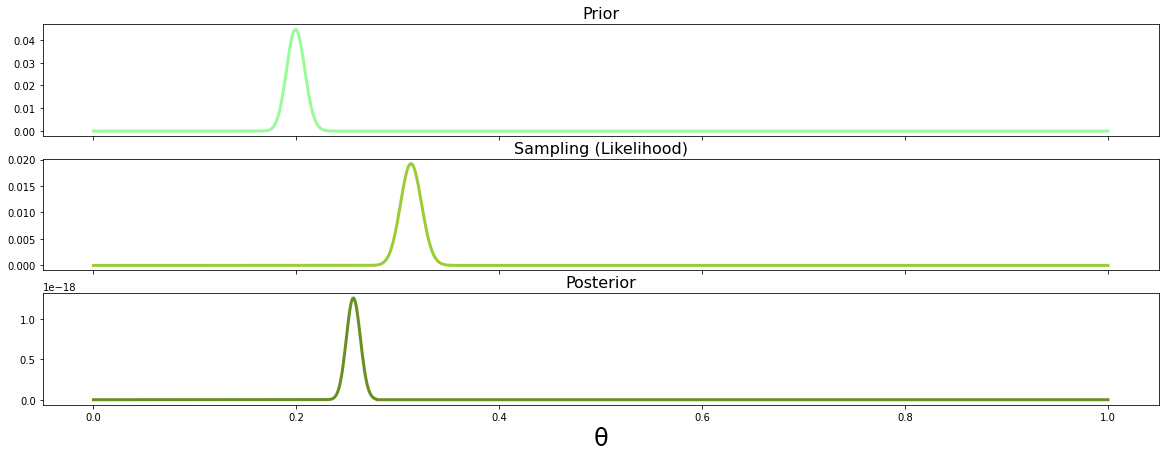

In [9]:
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(20,7))
plt.xlabel('θ', fontsize=24)
axes[0].plot(theta_range, prior, label="Prior", linewidth=3, color='palegreen')
axes[0].set_title("Prior", fontsize=16)
axes[1].plot(theta_range, likelihood, label="Likelihood", linewidth=3, color='yellowgreen')
axes[1].set_title("Sampling (Likelihood)", fontsize=16)
axes[2].plot(theta_range, posterior, label='Posterior', linewidth=3, color='olivedrab')
axes[2].set_title("Posterior", fontsize=16)
plt.show()